In [1]:
from ml.EnsembleLearning import AdaBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
column_name = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact',
    'day', 'month', 'duration', 'campaign',
    'pdays', 'previous', 'poutcome', 'label',
]
df = pd.read_csv('./data/bank/train.csv', names=column_name)
df['label'] = df['label'].map({'yes': 1, 'no':-1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,-1
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,-1
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,1
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,-1
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,1


In [3]:
df_test = pd.read_csv('./data/bank/test.csv', names=column_name)
df_test['label'] = df_test['label'].map({'yes': 1, 'no':-1})
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,management,single,secondary,no,764,no,no,cellular,12,jun,230,2,-1,0,unknown,-1
1,39,blue-collar,married,secondary,no,49,yes,no,cellular,14,may,566,1,370,2,failure,-1
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,-1
3,31,entrepreneur,single,tertiary,no,247,yes,yes,unknown,2,jun,273,1,-1,0,unknown,-1
4,26,student,single,unknown,no,2020,no,no,telephone,28,jan,42,3,-1,0,unknown,-1


In [4]:
numerical_attributes = {
    'age': 'median',
    'balance': 'median',
    'day': 'median',
    'duration': 'median',
    'campaign': 'median',
    'pdays': 'median',
    'previous': 'median',
}
T = 500

In [5]:
model = AdaBoostClassifier()
start = time.time()
model.fit(df, numerical_attributes=numerical_attributes, T=T, label='label')
print(f'\rTime to execute: {time.time() - start}s')

Time to execute: 203.71105480194092s


In [26]:
report = {
    'error': {
        'training': [],
        'test': [],
    },
    'dt': {
        'training': [],
        'test': [],
    }
}

In [27]:
start = time.time()
for t in range(1, T+1):
    print(f'\r{t/T}%', end='')
    report['error']['training'].append(1-sum(model.predict_batch(df, T=t) == df['label'])/len(df))
    report['error']['test'].append(1-sum(model.predict_batch(df_test, T=t) == df_test['label'])/len(df_test))
    report['dt']['training'].append(1-sum(model._hypothesises[t-1].predict_batch(df) == df['label'])/len(df))
    report['dt']['test'].append(1-sum(model._hypothesises[t-1].predict_batch(df_test) == df_test['label'])/len(df_test))
print(f'\rTime to execute: {time.time() - start}s')

Time to execute: 8469.97112774849s


In [28]:
x = np.arange(T)

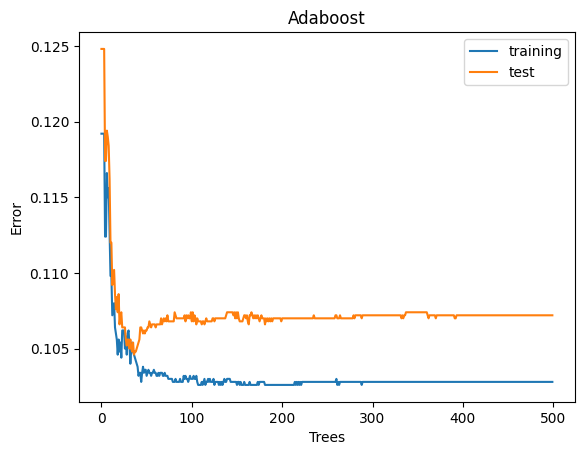

In [29]:
plt.plot(x, report['error']['training'], label='training')
plt.plot(x, report['error']['test'], label='test')
plt.xlabel('Trees')
plt.ylabel('Error')
plt.title('Adaboost')
plt.legend()
plt.show()

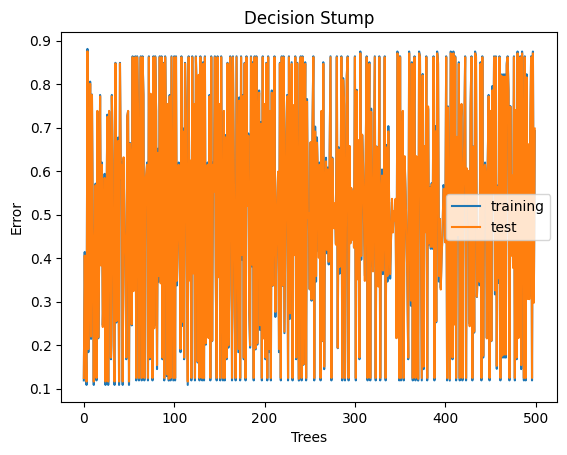

In [30]:
plt.plot(x, report['dt']['training'], label='training')
plt.plot(x, report['dt']['test'], label='test')
plt.xlabel('Trees')
plt.ylabel('Error')
plt.title('Decision Stump')
plt.legend()
plt.show()

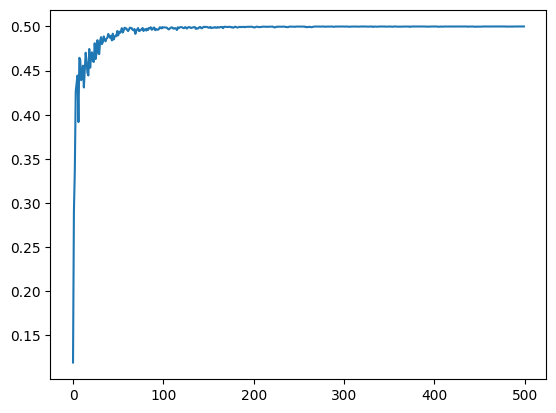

In [24]:
plt.plot(x, model._info['et'])

In [31]:
min(report['error']['test'])

0.10460000000000003

In [34]:
report['error']['test'].index(min(report['error']['test']))

36